In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [14]:
train = pd.read_csv('./train.csv')
print(train.shape)
train.drop(columns = 'Id',inplace = True)
print(train.shape)
train

(1095, 81)
(1095, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
1091,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
1092,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,187750
1093,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000


## 取出連續型特徵 (方便降維)

In [32]:
""" Your code here: """
print(train.info())
#這邊的column代表一行行的直行，而那些直行中我只要dtype是非object的
continual = train.columns[train.dtypes != 'object']
print(continual)
#continual現在是一個list是每一個直行代表的標題，我接下來要呼叫被我篩選出來的這些直行 會從原本的80直行變成37直行
df = train[continual]
print(df.shape)
print(df)

        
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1095 non-null   int64  
 1   MSZoning       1095 non-null   object 
 2   LotFrontage    904 non-null    float64
 3   LotArea        1095 non-null   int64  
 4   Street         1095 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1095 non-null   object 
 7   LandContour    1095 non-null   object 
 8   Utilities      1095 non-null   object 
 9   LotConfig      1095 non-null   object 
 10  LandSlope      1095 non-null   object 
 11  Neighborhood   1095 non-null   object 
 12  Condition1     1095 non-null   object 
 13  Condition2     1095 non-null   object 
 14  BldgType       1095 non-null   object 
 15  HouseStyle     1095 non-null   object 
 16  OverallQual    1095 non-null   int64  
 17  OverallCond    1095 non-null   int64  
 18  YearBuil

## 分析缺失值

MSSubClass         0
LotFrontage      191
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       67
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
LotFrontage    191
MasVnrArea       7
GarageYrBlt     67
dtype: int64


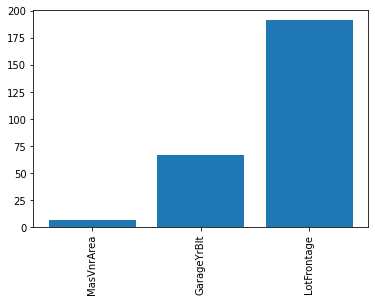

In [49]:
""" Your code here: 練習印出缺失值圖表 """
#isnull是不林變數判斷式，把每一小格用true and false做代表 再用sum做計數
missing = df.isnull().sum(axis = 0)
print(missing)
#上面的missing指的是數值甚麼0、191、7....的，接著我從mising中篩選出數量大於零的項目有三項，把他稱呼為missing real
missing_real = missing[missing>0]
print(missing_real)
#inplace = true 就是讓那種自己會顯示結果的函數 不要顯示，但在這李我想讓它顯示，所以就不加了
sort_missing = missing_real.sort_values()

#開始畫圖
#x軸是名字而這裡的名字就是出現在每一列的第一個也就是index那裏並用list將其包起來，y軸我就要數字
plt.bar(list(sort_missing.index) ,np.array(sort_missing) )
plt.xticks(rotation = 'vertical')
plt.show()

## 去除缺失值

In [50]:
""" Your code here: 去除缺失值 """
df = df.dropna()
print(df.shape)

(838, 37)


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [64]:
""" Your code here: """
#去除缺失值後，特別把銷售價格拉出來y軸
target = 'SalePrice'
X = np.asarray(df.drop(columns = [target]))
Y = np.asarray(df[target])

# 將 Y 依照四分位距分成四類
Y = pd.qcut(Y,4,labels = False)
# 將 X 標準化
X = (X-X.mean(axis =0))/X.std(axis = 0)

print(X.shape,Y.shape)

(838, 36) (838,)


## 利用 TSNE 降維

In [70]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)

## 做圖

In [71]:
""" Your code here: """
df_tsne = pd.DataFrame()
print(X_tsne)
df_tsne['X_tsne1'] = X_tsne[:, 0]
df_tsne['X_tsne2'] = X_tsne[:, 1]
df_tsne['label'] = Y
df_tsne.head()

[[  8.354055   -9.017138 ]
 [ 13.830232   -6.610801 ]
 [  9.511462   24.728352 ]
 ...
 [ 18.925436   15.184341 ]
 [ 14.224242   18.363972 ]
 [-11.240873    7.2024674]]


,X_tsne1,X_tsne2,label
0,8.354055,-9.017138,2
1,13.830232,-6.610801,2
2,9.511462,24.728352,2
3,-20.020861,-8.805480,0
4,-8.360869,9.874892,0


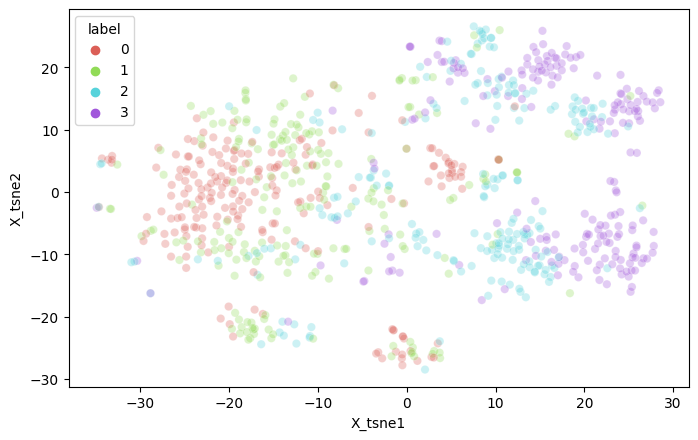

In [72]:
plt.figure(figsize = (8,5) , dpi =100)
sns.scatterplot(
    x = 'X_tsne1',y= 'X_tsne2' , hue = 'label',palette = sns.color_palette('hls', 4), data = df_tsne,legend = 'full',
    alpha = 0.3
    )
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

In [74]:
#0, 1兩個類別重疊性高； 2, 3 兩個類別重疊性也高，但 01 跟 23 有較明顯的差距，故之後努力方向為將 01, 23 個別切分開來

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

In [75]:
#目前只使用連續型的特徵，尚未使用離散特徵，且只是單純的將具缺失值的資料刪除，故可以預期降維效果不佳